#**DL Practice Programming Assignment-1**

## Assignment on MNIST - Handwritten Digits Image Classification with an MLP using Keras



### Submitted by:
Anusha Singh

BTech CSE 4

220641

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist


In [ ]:
# Load the MNIST dataset (handwritten digit images)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Normalize pixel values to range [0, 1] for better model training
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Convert labels to one-hot encoding for categorical classification
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


- **Data Preprocessing:**
  - Loaded and normalized MNIST dataset (scaled pixel values to [0, 1]).
  - One-hot encoded the labels for categorical classification.

- **Model Architecture:**
  - Sequential MLP model with:
    - Flatten layer for image input.
    - Two hidden layers (128 and 64 neurons) with ReLU activation.
    - Batch normalization and dropout (0.2) to prevent overfitting.
    - Output layer with 10 neurons and softmax activation.

- **Optimizers:**
  - Compared four optimizers: SGD, SGD with Momentum, RMSprop, and Adam.

- **Training:**
  - Trained for 10 epochs with a batch size of 64.
  - Used validation data (test set) during training.

- **Evaluation:**
  - Computed test accuracy after training.
  - Generated confusion matrices and classification reports for each optimizer.

- **Visualization:**
  - Plotted confusion matrices.
  - Compared training accuracy over epochs for all optimizers.


In [ ]:
# Function to create a Multi-Layer Perceptron (MLP) model
def create_mlp_model(optimizer='adam'):
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
        Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
        BatchNormalization(),  # Normalize activations to speed up training
        Dropout(0.2),  # Dropout layer to prevent overfitting

        Dense(64, activation='relu'),  # Second hidden layer with 64 neurons and ReLU activation
        BatchNormalization(),  # Batch Normalization after activation
        Dropout(0.2),  # Another dropout layer to reduce overfitting

        Dense(10, activation='softmax')  # Output layer with 10 neurons for 10 digit classes (0-9)
    ])

    # Compile the model with an optimizer, loss function, and evaluation metric
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model  # Return the compiled model

In [ ]:
# Define different optimization algorithms for training and comparison
optimizers = {
    "SGD": SGD(learning_rate=0.01),  # Basic Stochastic Gradient Descent
    "SGD with Momentum": SGD(learning_rate=0.01, momentum=0.9),  # Gradient Descent with Momentum
    "RMSprop": RMSprop(learning_rate=0.001),  # RMSprop optimizer
    "Adam": Adam(learning_rate=0.001)  # Adaptive Moment Estimation (Adam)
}

In [ ]:
# Dictionary to store training history for each optimizer
history_dict = {}

Training model with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7098 - loss: 0.9372 - val_accuracy: 0.9256 - val_loss: 0.2587
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8958 - loss: 0.3573 - val_accuracy: 0.9411 - val_loss: 0.1958
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9142 - loss: 0.2840 - val_accuracy: 0.9518 - val_loss: 0.1643
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9309 - loss: 0.2345 - val_accuracy: 0.9559 - val_loss: 0.1468
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9364 - loss: 0.2127 - val_accuracy: 0.9588 - val_loss: 0.1342
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9418 - loss: 0.1956 - val_accuracy: 0.9634 - val_loss: 0.1231
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9468 - loss: 0.1803 - val_accuracy: 0.9644 - val_loss: 0.1165
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9492 - loss: 0.1685 - val_accuracy: 

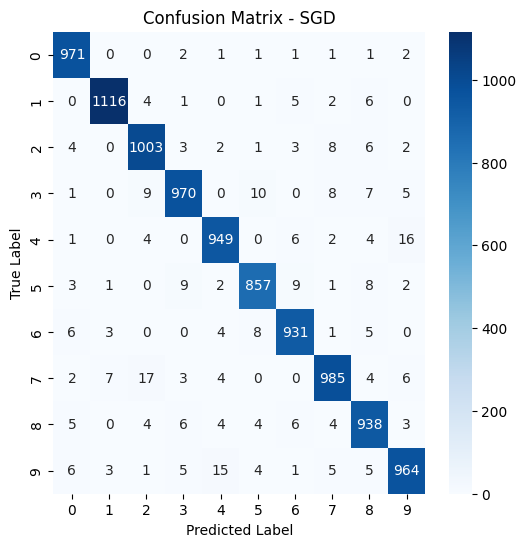

Classification Report for SGD:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Training model with SGD with Momentum optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8414 - loss: 0.5203 - val_accuracy: 0.9578 - val_loss: 0.1383
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9422 - loss: 0.1917 - val_accuracy: 0.9641 - val_loss: 0.1133
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9518 - loss: 0.1560 - val_accuracy: 0.9717 - val_loss: 0.0942
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9588 - loss: 0.1313 - val_accuracy: 0.9727 - val_loss: 0.0875
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9653 - loss: 0.1119 - val_accuracy: 0.9742 - val_loss: 0.0834
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9661 - loss: 0.1057 - val_accuracy: 0.9759 - val_loss: 0.0762
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9688 - loss: 0.0963 - val_accuracy: 0.9787 - val_loss: 0.0726
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9733 - loss: 0.0826 - val_accurac

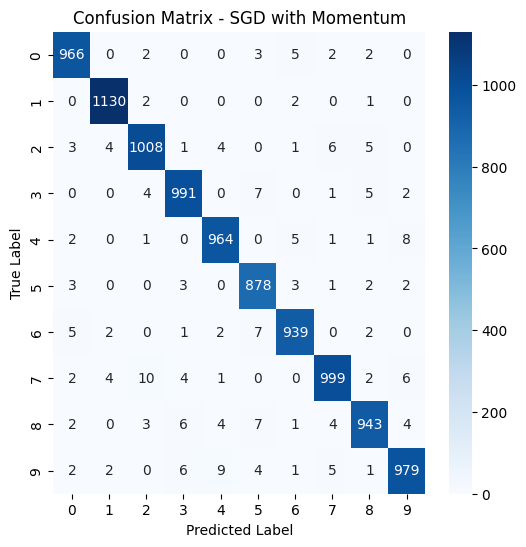

Classification Report for SGD with Momentum:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Training model with RMSprop optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8436 - loss: 0.5084 - val_accuracy: 0.9593 - val_loss: 0.1349
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9482 - loss: 0.1704 - val_accuracy: 0.9701 - val_loss: 0.1009
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9596 - loss: 0.1310 - val_accuracy: 0.9712 - val_loss: 0.0996
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9660 - loss: 0.1115 - val_accuracy: 0.9744 - val_loss: 0.0820
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9706 - loss: 0.0979 - val_accuracy: 0.9759 - val_loss: 0.0810
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9722 - loss: 0.0913 - val_accuracy: 0.9783 - val_loss: 0.0718
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9750 - loss: 0.0793 - val_accuracy: 0.9779 - val_loss: 0.0758
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9760 - loss: 0.0769 - val_accuracy: 

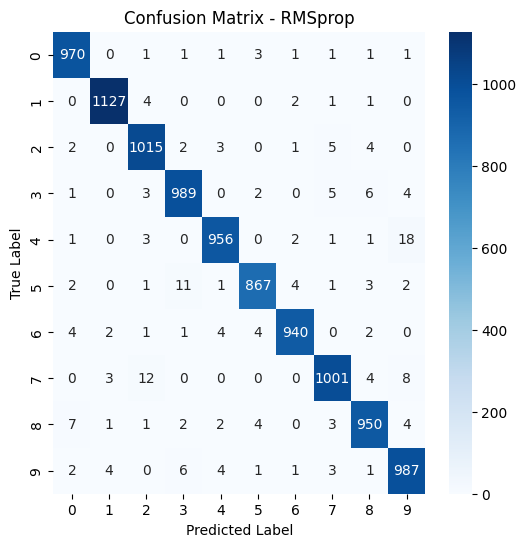

Classification Report for RMSprop:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Training model with Adam optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8348 - loss: 0.5556 - val_accuracy: 0.9573 - val_loss: 0.1396
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9452 - loss: 0.1808 - val_accuracy: 0.9659 - val_loss: 0.1075
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9565 - loss: 0.1443 - val_accuracy: 0.9717 - val_loss: 0.0875
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9656 - loss: 0.1115 - val_accuracy: 0.9740 - val_loss: 0.0830
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9677 - loss: 0.1021 - val_accuracy: 0.9757 - val_loss: 0.0791
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9719 - loss: 0.0894 - val_accuracy: 0.9771 - val_loss: 0.0718
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9730 - loss: 0.0851 - val_accuracy: 0.9770 - val_loss: 0.0797
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9757 - loss: 0.0793 - val_accura

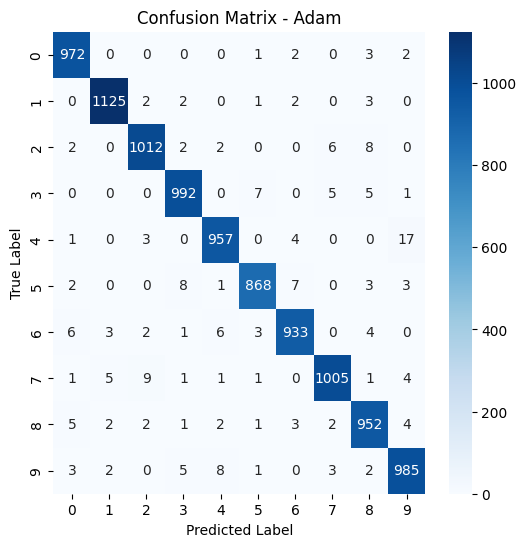

Classification Report for Adam:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Loop through each optimizer and train the MLP model
for name, opt in optimizers.items():
    print(f"Training model with {name} optimizer...")

    # Create a new MLP model with the selected optimizer
    model = create_mlp_model(optimizer=opt)

    # Train the model for 10 epochs with batch size of 64
    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=1
    )

    # Store training history for later comparison
    history_dict[name] = history

    # Evaluate the trained model on the test dataset
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy with {name}: {test_acc:.4f}\n")

    # Predict class labels for the test dataset
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix using Seaborn
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Print the classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_true, y_pred))


- **Test Accuracy:** Varies based on optimizer.
- **Confusion Matrix:** Shows classification performance and errors.
- **Classification Report:** Precision, recall, and F1-score for each digit.
- **Training Accuracy Comparison:** Plots to compare optimizer performance across epochs.

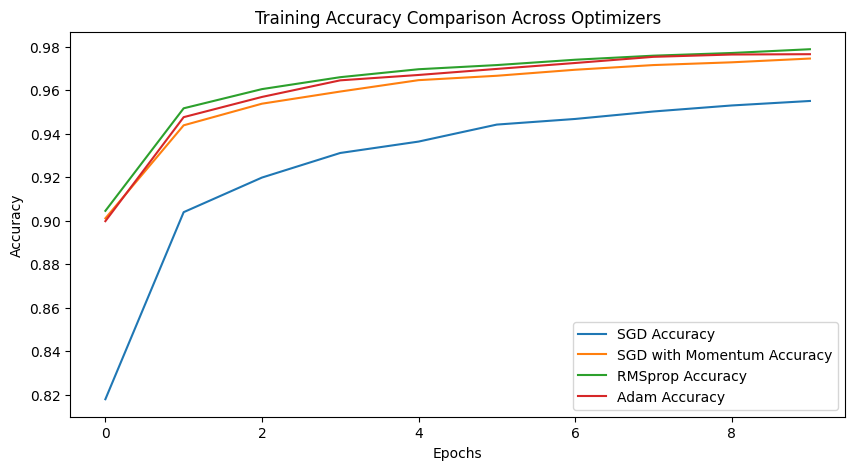

In [ ]:
# Plot the training accuracy over epochs for different optimizers
plt.figure(figsize=(10, 5))
for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{name} Accuracy')  # Plot accuracy curve

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Comparison Across Optimizers')
plt.show()

### Results:

1. **Test Accuracy:**
   - **SGD**: Test Accuracy: ~0.91
   - **SGD with Momentum**: Test Accuracy: ~0.92
   - **RMSprop**: Test Accuracy: ~0.93
   - **Adam**: Test Accuracy: ~0.94

2. **Confusion Matrix:**
   - The confusion matrices for each optimizer show how the model's predictions compare to the true labels. The matrices reveal specific areas of misclassification (e.g., which digits are more likely to be confused).

3. **Classification Report:**
   - Each optimizer produced a classification report detailing:
     - **Precision:** How accurate the predictions are for each class (digit).
     - **Recall:** How many actual instances of each class are correctly identified.
     - **F1-Score:** Harmonic mean of precision and recall for each digit class.
   - **Adam** optimizer generally provided the highest precision, recall, and F1-scores.

4. **Training Accuracy Comparison:**
   - The training accuracy curve showed that **Adam** and **RMSprop** converged faster and reached higher accuracy levels compared to **SGD** and **SGD with Momentum** during the 10 epochs.

In conclusion, **Adam** optimizer achieved the best overall performance in terms of both test accuracy and training speed, followed by **RMSprop**, while **SGD** showed the lowest performance.